In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt

# Loading and Vectorization of Labeled Dataset

In [3]:
abusive_data = "/Users/oluwafemi/Label_Unlabel.csv"

In [4]:
abusive_data = pd.read_csv(abusive_data, encoding ='ISO-8859-1')

In [5]:
ad=pd.DataFrame(data=abusive_data, columns=['Tweet','Category'])

In [6]:
ad['Tweet'] = ad['Tweet'].replace('[^a-zA-Z ]', '', regex=True)

In [7]:
afU = ad.apply(lambda x: x.astype(str).str.lower())

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer

In [9]:
w_token1 = nltk.tokenize.WhitespaceTokenizer()

In [10]:
stemmer1 = WordNetLemmatizer()

In [11]:
def stem_text1(Tweet):
    return [stemmer1.lemmatize(w) for w in w_token1.tokenize(Tweet)]

In [12]:
afU['Tweet']=afU.Tweet.apply(stem_text1)

In [13]:
z = afU['Tweet']

In [14]:
stop_words2 = open("/Users/oluwafemi/stop_words.txt")

In [15]:
For_Vectorize = [' '.join(x) for x in z]

In [16]:
For_Vectorize

['anc keep power in south africa but scandal cost it vote',
 'it mothrfuckn lucnhables man dollar a pack we gon make dat as clap wit deez healthy snack stack up the cheeseham with the turkey gimme dat caprisun bitch im thirsty a im picking up x of lunchables on an order',
 'live tweet culture is so damn annoying',
 'putting his life at risk to save others is an everyday occurrence for jeff to protect serve indie bestbooks',
 'snark is the idiot version of wit and were being polluted by it willmcavoyacn man aaronsorkin just get me today',
 'the future is social and circular evaverraes thats why i am happy to contribute within herwinsco to project reducing foodwaste whilst creating job opportunity in the socialeconomy rt bramvb saman met rudycoddens mee de nieuwe kringloopwinkel van ateljeevzw geopend niet zonder een straffe speech van evaverraes van herwinsco de toekomst is sociaal en circulair gent proficiat',
 'the hero journey in then is a journey of the soul of finding inner truth a

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [18]:
Is_vectorize = TfidfVectorizer(stop_words = stop_words2)

In [19]:
Y_class=abusive_data['Category']

In [20]:
L_Clus = Is_vectorize.fit_transform(For_Vectorize)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '39', 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', 'ain', 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', 'arent', 'arise', 'around', 'arpa', 'as', '

In [21]:
L_Clus.shape

(338, 2655)

In [22]:
L_Clus

<338x2655 sparse matrix of type '<class 'numpy.float64'>'
	with 6645 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

In [192]:
# Feature Selection
# No_of_Feature K = {3, 5, 10,15, 20}

In [193]:
chisquare1 = SelectKBest(chi2, k=3)

In [194]:
X_L1 = chisquare1.fit_transform(L_Clus, Y_class)

In [195]:
X_L1.shape

(338, 3)

In [196]:
print (X_L1)

  (0, 0)	0.2969293572077103
  (0, 2)	0.2888046318609141
  (43, 1)	0.2769994118986174
  (43, 0)	0.2769994118986174
  (43, 2)	0.2694200193991212
  (87, 1)	0.09234012026971003
  (87, 0)	0.18468024053942006
  (87, 2)	0.17962693006357708
  (92, 1)	0.14626718301272418
  (92, 0)	0.14626718301272418
  (92, 2)	0.2845298985628616
  (112, 1)	0.1586854849560085
  (112, 0)	0.1586854849560085
  (112, 2)	0.15434345561301954
  (197, 2)	0.17686827862144164
  (220, 1)	0.49412961842016806
  (334, 1)	0.3371418830823087
  (334, 0)	0.16857094154115435
  (334, 2)	0.3279168430636847


In [120]:
X_D1 = X_L1.todense()

In [89]:
chisquare2 = SelectKBest(chi2, k=5)

In [90]:
X_L2 = chisquare2.fit_transform(L_Clus, Y_class)

In [91]:
chisquare3 = SelectKBest(chi2, k=10)

In [92]:
X_L3 = chisquare3.fit_transform(L_Clus, Y_class)

In [93]:
chisquare4 = SelectKBest(chi2, k=15)

In [94]:
X_L4 = chisquare4.fit_transform(L_Clus, Y_class)

In [95]:
chisquare5 = SelectKBest(chi2, k=20)

In [96]:
X_L5 = chisquare5.fit_transform(L_Clus, Y_class)

In [97]:
chisquare6 = SelectKBest(chi2, k=25)

In [98]:
X_L6 = chisquare6.fit_transform(L_Clus, Y_class)

In [99]:
chisquare7 = SelectKBest(chi2, k=30)

In [100]:
X_L7 = chisquare7.fit_transform(L_Clus, Y_class)

# Loading and Vectorization of Unlabelled

In [23]:
unlabel_data = "/Users/oluwafemi/Profane_Unlabelled.csv"

In [24]:
unlabel_data = pd.read_csv(unlabel_data, encoding ='ISO-8859-1')

In [25]:
unl=pd.DataFrame(data=unlabel_data, columns=['Tweet'])

In [26]:
unl['Tweet'] = unl['Tweet'].replace('[^a-zA-Z ]', '', regex=True)

In [27]:
afUl = unl.apply(lambda x: x.astype(str).str.lower())

In [28]:
afUl['Tweet']=afUl.Tweet.apply(stem_text1)

In [29]:
z1 = afUl['Tweet']

In [30]:
For_Vectorize1 = [' '.join(x) for x in z1]

In [31]:
U_Clus = Is_vectorize.fit_transform(For_Vectorize1)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '39', 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', 'ain', 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', 'arent', 'arise', 'around', 'arpa', 'as', '

In [32]:
U_Clus

<8555x20150 sparse matrix of type '<class 'numpy.float64'>'
	with 174553 stored elements in Compressed Sparse Row format>

In [33]:
U_Clus.shape

(8555, 20150)

In [34]:
#Testing of Multiplication of U_Clus and X_L1
# Testing of Clustering of Mul_F1

In [166]:
Mul_F1 = (U_Clus .multiply(0.2969293572077103)) + (U_Clus .multiply(0.2888046318609141))+ (U_Clus .multiply(0.2769994118986174))+ (U_Clus .multiply(0.2769994118986174))+(U_Clus .multiply(0.2694200193991212))+(U_Clus .multiply(0.09234012026971003))+(U_Clus.multiply(0.18468024053942006))+(U_Clus .multiply(0.17962693006357708))+ (U_Clus .multiply(0.14626718301272418))+ (U_Clus .multiply(0.14626718301272418))+(U_Clus .multiply(0.2845298985628616))+(U_Clus .multiply(0.1586854849560085))+(U_Clus .multiply(0.1586854849560085))+(U_Clus .multiply(0.15434345561301954))+(U_Clus .multiply(0.17686827862144164))+(U_Clus .multiply(0.49412961842016806))+(U_Clus .multiply(0.3371418830823087))+(U_Clus .multiply(0.16857094154115435))+(U_Clus .multiply(0.3279168430636847))

In [168]:
print(Mul_F1)

  (0, 12817)	1.72524538560824
  (0, 17534)	0.994179290495593
  (0, 19523)	0.7594017784037073
  (0, 12729)	0.8573230209622731
  (0, 17950)	1.1824518200661158
  (0, 4427)	0.838327652608468
  (0, 18537)	1.7032079065823706
  (0, 8013)	0.8297936902466369
  (0, 5186)	0.45044081628898963
  (0, 5083)	0.6852919305788656
  (0, 15600)	1.2365345160444243
  (0, 12609)	0.8372138638560188
  (0, 19148)	0.6612507047036988
  (0, 12348)	1.4295522508310474
  (0, 5785)	1.113954536048171
  (0, 17660)	0.5646719968571444
  (0, 12714)	0.7578834730483964
  (0, 17615)	0.7879572745035376
  (0, 19219)	0.6511642128692554
  (1, 12817)	0.42651608121970586
  (1, 17534)	0.49156306523025284
  (1, 12609)	0.20697645641219103
  (1, 17660)	0.2791970223865934
  (1, 12714)	0.3747287100632588
  (1, 898)	0.7068293345509314
  :	:
  (8552, 19683)	0.8211419947943817
  (8552, 13568)	1.0289431289334132
  (8552, 66)	0.6382936904139771
  (8552, 11996)	1.3428448732474787
  (8552, 12131)	1.4885457108740405
  (8552, 11896)	1.488545710874

In [162]:
kmeans_testing100=KMeans(n_clusters=2, random_state=0).fit(Mul_F1)

In [165]:
kmeans_testing100.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
# Clustering of Unlabeled with Important Features of Labeled(3, 5, 10, 15,20, 25)

In [53]:
kmeans_testing11=KMeans(n_clusters=2, random_state=0).fit(U_Clus,X_L1)

In [96]:
kmeans_testing11.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [164]:
np.set_printoptions(edgeitems=20000)
np.core.arrayprint._line_width = 20000

In [ ]:
# K = 3

In [55]:
ta = kmeans_testing11.labels_

In [57]:
ta.shape

(8555,)

In [58]:
kmeans_testing10=KMeans(n_clusters=2, random_state=0).fit(U_Clus)

In [89]:
kmeans_testing10.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# K = All

In [60]:
to = kmeans_testing10.labels_

In [61]:
kmeans_testing12=KMeans(n_clusters=2, random_state=0).fit(U_Clus, X_L2)

In [90]:
kmeans_testing12.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# K = 5

In [63]:
tb = kmeans_testing12.labels_

In [64]:
kmeans_testing13=KMeans(n_clusters=2, random_state=0).fit(U_Clus, X_L3)

In [91]:
kmeans_testing13.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
#K = 10

In [66]:
tc=kmeans_testing13.labels_

In [67]:
kmeans_testing14=KMeans(n_clusters=2, random_state=0).fit(U_Clus, X_L4)

In [93]:
kmeans_testing14.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# K = 15

In [69]:
td=kmeans_testing14.labels_

In [70]:
kmeans_testing15=KMeans(n_clusters=2, random_state=0).fit(U_Clus, X_L5)

In [94]:
kmeans_testing15.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# K = 20

In [72]:
te = kmeans_testing15.labels_

In [73]:
kmeans_testing16=KMeans(n_clusters=2, random_state=0).fit(U_Clus, X_L6)

In [95]:
kmeans_testing16.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# K = 25

In [75]:
tf = kmeans_testing16.labels_

In [ ]:
# Wrong Trial of Voting using Ensemble

In [24]:
from sklearn import ensemble

In [80]:
vot = sklearn.ensemble.VotingClassifier(estimators = [to, ta, tb, tc, td, te, tf], voting = 'hard')

In [81]:
vot

VotingClassifier(estimators=[array([0, 0, ..., 0, 0]), array([0, 0, ..., 0, 0]), array([0, 0, ..., 0, 0]), array([0, 0, ..., 0, 0]), array([0, 0, ..., 0, 0]), array([0, 0, ..., 0, 0]), array([0, 0, ..., 0, 0])],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

# Proposed Semi-supervised Learning Model

In [ ]:
# Loading of Combined Labelled 377, New Labelled 8555 and Test Data : 1352

In [25]:
ExpandedTrain="/Users/oluwafemi/Label_Then_Cluster.csv"

In [26]:
ExpandedTrain = pd.read_csv(ExpandedTrain, encoding ='ISO-8859-1')

In [27]:
XTrain=pd.DataFrame(data=ExpandedTrain, columns=['Tweet','Category'])

In [28]:
XTrain['Tweet'] = XTrain['Tweet'].replace('[^a-zA-Z ]', '', regex=True)

In [29]:
XT = XTrain.apply(lambda x: x.astype(str).str.lower())

In [30]:
import nltk
from nltk.stem import WordNetLemmatizer

In [31]:
w_tokenizer2 = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer2 = WordNetLemmatizer()

In [32]:
def lemmatize_text3(Tweet):
    return [Lemmatizer2.lemmatize(w) for w in w_tokenizer2.tokenize(Tweet)]

In [33]:
XT['Tweet']=XT.Tweet.apply(lemmatize_text3)

In [34]:
f_2 = XT['Tweet']

In [35]:
fJ = [' '.join(x) for x in f_2]

In [36]:
y_categ=ExpandedTrain['Category']

In [37]:
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import SMOTE

In [38]:
FJ_train, FJ_test, y_categ_train, y_categ_test = train_test_split(fJ, y_categ, test_size =0.1319668, random_state = 0)

In [62]:
y_categ_test 

3784    0
7317    0
1453    0
974     1
6865    0
       ..
2499    0
5406    0
7493    0
9133    0
3311    0
Name: Category, Length: 1352, dtype: int64

In [39]:
# Support Vector Machine Test

In [40]:
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

In [251]:
step_Cluster2 = [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('SVM', SVC(kernel='linear'))]

In [252]:
pipeline_CT2 = Pipeline(step_Cluster2)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [41]:
parameters_CT2 = {'vect__ngram_range':[(2,6), (3,7), (4,8)],
              'tfidf__use_idf':(True, False),
              'SVM__C':[0.001,0.01,0.1,1,10,100,1000]}

In [42]:
grid_CT_Word2 = GridSearchCV(pipeline_CT2, param_grid=parameters_CT2, cv=10, n_jobs= -1)

NameError: name 'pipeline_CT2' is not defined

In [43]:
grid_CT_Word2.fit(FJ_train, y_categ_train)

NameError: name 'grid_CT_Word2' is not defined

In [257]:
grid_CT_Word2.score(FJ_test,y_categ_test)

0.966715976331361

In [258]:
grid_CT_Word2.best_params_

{'SVM__C': 100, 'tfidf__use_idf': True, 'vect__ngram_range': (2, 6)}

In [259]:
grid_CT_Word2.best_score_

0.9597436185764084

In [260]:
predictions_CT2=grid_CT_Word2.predict(FJ_test)

In [261]:
print(classification_report(y_categ_test,predictions_CT2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1118
           1       0.94      0.87      0.90       234

   micro avg       0.97      0.97      0.97      1352
   macro avg       0.95      0.93      0.94      1352
weighted avg       0.97      0.97      0.97      1352



In [262]:
grid_CT_Word2.cv_results_

C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([1022.15429075, 1056.72937903,  622.37822344,  660.13164628,
         356.06749046,  446.97544518,  226.71562526,  320.78117375,
         192.81509986,  279.47926366,  186.27665653,  277.63431005,
         187.95521078,  269.22289557]),
 'std_fit_time': array([43.2642434 , 12.84210878,  6.55033443, 12.38713765,  5.38544356,
         8.77681527,  4.38255936,  4.07359893,  3.14260765,  9.65407439,
         5.84820796,  7.01896198,  4.68911368, 25.93190953]),
 'mean_score_time': array([65.81958525, 63.20606713, 40.93438876, 35.01887162, 22.48930197,
        22.30282891, 14.33879604, 14.69024503, 11.74560764, 12.11091819,
        11.17211149, 10.9205194 , 11.42988713, 10.28922756]),
 'std_score_time': array([4.4476974 , 5.03389223, 2.36425947, 1.04738815, 0.89162172,
        0.56132623, 0.77468114, 0.73499938, 0.45940338, 1.42963709,
        0.25166243, 0.51556014, 0.44461158, 0.92715581]),
 'param_SVM__C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1

In [263]:
print(metrics.confusion_matrix(y_categ_test,predictions_CT2))

[[1104   14]
 [  31  203]]


In [ ]:
# Proposed Model _  Word + SVM

In [50]:
step_Cluster_Word = [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('SVM', SVC(kernel='linear'))]

In [55]:
pipeline_CT_Word = Pipeline(step_Cluster_Word)
parameters_CT_Word = {'vect__ngram_range':[(1,1)],
              'SVM__C':[0.01]}
grid_CT_Word = GridSearchCV(pipeline_CT_Word, param_grid=parameters_CT_Word, cv=10, n_jobs= -1)

In [56]:
grid_CT_Word.fit(FJ_train, y_categ_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [57]:
grid_CT_Word.score(FJ_test, y_categ_test)

0.9578402366863905

In [58]:
predictions_CT_Word=grid_CT_Word.predict(FJ_test)
print(classification_report(y_categ_test,predictions_CT_Word))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1118
           1       0.95      0.80      0.87       234

    accuracy                           0.96      1352
   macro avg       0.95      0.90      0.92      1352
weighted avg       0.96      0.96      0.96      1352



In [59]:
grid_CT_Word.cv_results_

{'mean_fit_time': array([50.36107316]),
 'std_fit_time': array([6.20609676]),
 'mean_score_time': array([2.38757336]),
 'std_score_time': array([0.34857798]),
 'param_SVM__C': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__ngram_range': masked_array(data=[(1, 1)],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'SVM__C': 0.01, 'vect__ngram_range': (1, 1)}],
 'split0_test_score': array([0.96179775]),
 'split1_test_score': array([0.9505618]),
 'split2_test_score': array([0.95842697]),
 'split3_test_score': array([0.96292135]),
 'split4_test_score': array([0.95617978]),
 'split5_test_score': array([0.95950506]),
 'split6_test_score': array([0.96062992]),
 'split7_test_score': array([0.95950506]),
 'split8_test_score': array([0.96171171]),
 'split9_test_score': array([0.94707207]),
 'mean_test_score': array([0.957832]),
 'std_test_score': array([0.00491634]),
 'rank_test_sc

In [60]:
print(metrics.confusion_matrix(y_categ_test,predictions_CT_Word))

[[1108   10]
 [  47  187]]


In [ ]:
# Liblinear Logistic Regression (L1 & L2)

In [33]:
# Logistic Regression Test

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
step_Cluster3 = [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [44]:
pipeline29 = Pipeline(step_Cluster3)

In [45]:
parameters291 = {'vect__ngram_range':[(2,6)],
              'classifier__penalty' : ['l2'],
              'classifier__C': [29.76],
              'classifier__solver': ['liblinear']}

In [47]:
grid291 = GridSearchCV(pipeline29, param_grid=parameters291, cv=10, n_jobs= -1)

In [49]:
grid291.fit(FJ_train, y_categ_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [271]:
grid29.score(FJ_test,y_categ_test)

0.9696745562130178

In [50]:
np.set_printoptions(edgeitems=50000)
np.core.arrayprint._line_width = 50000

In [51]:
y_SSL= grid291.predict(FJ_test)

In [52]:
y_SSL   

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [272]:
grid29.best_params_

{'classifier__C': 29.763514416313132,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear',
 'tfidf__use_idf': True,
 'vect__ngram_range': (2, 6)}

In [273]:
grid29.best_score_

0.961317890475655

In [274]:
predictions29=grid29.predict(FJ_test)

In [275]:
print(classification_report(y_categ_test,predictions29))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1118
           1       0.93      0.89      0.91       234

   micro avg       0.97      0.97      0.97      1352
   macro avg       0.95      0.94      0.95      1352
weighted avg       0.97      0.97      0.97      1352



In [276]:
grid29.cv_results_

C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([181.34174409, 148.94964612,  32.36778193, 139.45839355,
         28.47080112, 138.50546958,  29.36768014, 144.12039034,
         29.56135883, 145.1586602 ,  32.38017902, 136.70667312,
         28.4600101 , 138.94233406,  29.63935602, 150.26279833,
         29.47993147, 148.58788714,  30.42381494, 140.95554309,
         31.61120949, 140.8485002 ,  31.61442194, 146.04836259,
         33.06598341, 167.43922918,  33.03602855, 138.70138791,
         33.51907897, 142.1396924 ,  33.88551228, 141.47317445,
         32.26122739, 139.92034893,  33.71899374, 145.22624388,
         33.14715555, 140.60220859,  38.02374384, 146.31364434,
         32.3589807 , 143.13729956,  38.48779168, 152.16551819,
         33.20839398, 145.05415814,  41.12060242, 154.63639522,
         34.40179467, 147.95410433,  42.10116892, 162.61666224,
         37.02835581, 182.33349152,  60.90566499, 181.00419652,
         48.65702507, 171.80722885,  58.80189314, 206.54175868,
         40.03927934, 1

In [277]:
print(metrics.confusion_matrix(y_categ_test,predictions29))

[[1102   16]
 [  25  209]]


In [ ]:
# Word + LogReg

In [65]:
step_CT4_Word = [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]
pipeline_CT4_Word = Pipeline(step_CT4_Word)
parameters_CT4_Word = {'vect__ngram_range':[(1,1)],
              'classifier__penalty' : ['l2'],
              'classifier__C': (np.logspace(-4, 4, 20)),
              'classifier__solver': ['liblinear']}
grid_CT4_Word = GridSearchCV(pipeline_CT4_Word, param_grid=parameters_CT4_Word, cv=10, n_jobs= -1)

In [66]:
grid_CT4_Word.fit(FJ_train, y_categ_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [67]:
grid_CT4_Word.score(FJ_test, y_categ_test)

0.9630177514792899

In [68]:
grid_CT4_Word.best_params_

{'classifier__C': 29.763514416313132,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear',
 'vect__ngram_range': (1, 1)}

In [69]:
grid_CT4_Word.best_score_

0.9578320026987518

In [70]:
predictions_CT4_Word=grid_CT4_Word.predict(FJ_test)
print(classification_report(y_categ_test,predictions_CT4_Word))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1118
           1       0.89      0.89      0.89       234

    accuracy                           0.96      1352
   macro avg       0.94      0.94      0.94      1352
weighted avg       0.96      0.96      0.96      1352



In [71]:
grid_CT4_Word.cv_results_

{'mean_fit_time': array([6.76416306, 7.73148682, 8.78151541, 7.45898438, 8.8317451 ,
        8.60858829, 7.61489437, 7.3477819 , 8.32759705, 8.09102833,
        8.26561248, 7.35246921, 7.15854616, 7.20144672, 7.27523756,
        8.21151478, 7.89042194, 7.36498895, 7.43131945, 7.30862684]),
 'std_fit_time': array([0.19559604, 0.66312724, 0.59527056, 0.51713132, 0.54769016,
        0.24359177, 0.40786376, 0.29993735, 0.29470766, 0.47205173,
        1.06743449, 0.3309207 , 0.13541523, 0.21262903, 0.19936682,
        0.53570346, 0.39612995, 0.24208873, 0.26145228, 0.27236073]),
 'mean_score_time': array([0.05021594, 0.06752055, 0.05252218, 0.05066063, 0.0630543 ,
        0.05681171, 0.04490347, 0.05288858, 0.05980706, 0.06466632,
        0.05201764, 0.04750412, 0.05115726, 0.04520681, 0.04912467,
        0.04827156, 0.05092323, 0.05062895, 0.04384165, 0.04088302]),
 'std_score_time': array([0.00784395, 0.024862  , 0.01445077, 0.00860238, 0.01659768,
        0.01808562, 0.00842359, 0.006075

In [72]:
print(metrics.confusion_matrix(y_categ_test,predictions_CT4_Word))

[[1093   25]
 [  25  209]]


In [ ]:
# Gradient Boosting

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [42]:
step_GB = [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', GradientBoostingClassifier())]
pipeline_GB = Pipeline(step_GB)

In [43]:
parameters_GB = {'vect__ngram_range': [(2,6),(3,7), (4,8)],
                'classifier__n_estimators': [100, 200],
                'classifier__max_depth': [2, 4, 6],
                'classifier__min_samples_split': [100, 200]}
grid_GB = GridSearchCV(pipeline_GB, param_grid=parameters_GB, cv=10, n_jobs=-1)

In [ ]:
grid_GB.fit(FJ_train, y_categ_train)

In [45]:
grid_GB.score(FJ_test,y_categ_test)

0.9718934911242604

In [46]:
grid_GB.best_params_

{'classifier__max_depth': 6,
 'classifier__min_samples_split': 100,
 'classifier__n_estimators': 200,
 'vect__ngram_range': (2, 6)}

In [47]:
grid_GB.best_score_

0.9630046103677049

In [49]:
predictions_GB=grid_GB.predict(FJ_test)
print(classification_report(y_categ_test,predictions_GB))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1118
           1       0.93      0.91      0.92       234

   micro avg       0.97      0.97      0.97      1352
   macro avg       0.96      0.95      0.95      1352
weighted avg       0.97      0.97      0.97      1352



In [50]:
grid_GB.cv_results_

C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\student\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([ 487.41066029,  516.85362132,  588.59396565,  800.12018285,
        1010.36748722, 1149.67165813,  416.26195035,  526.26729481,
         573.62890537,  786.58712692,  989.62976706, 1130.78215644,
         702.95746839,  864.90915246, 1015.0964514 , 1338.94959733,
        1635.25971842, 1926.88687899,  699.09359503,  855.12554498,
        1001.41550906, 1330.40041981, 1636.7834471 , 1900.45347722,
        1003.06441731, 1208.58552558, 1448.66986322, 1898.73374786,
        2308.36604593, 2718.49690566, 1005.98294203, 1215.69427221,
        1417.72090926, 2226.07363448, 2297.04000504, 2607.10452621]),
 'std_fit_time': array([ 50.73806694,   8.15538913,   9.40257368,  11.03854114,
         12.11870987,  15.96649901,   3.88909485,  12.68271013,
         34.79732097,  15.04018418,  10.16105214,  29.30523305,
         16.99739065,  12.09982051,  14.67326986,  15.5350392 ,
         13.93833157,  22.74267853,  14.53312181,   3.26983849,
          7.32451935,   8.0809640

In [51]:
print(metrics.confusion_matrix(y_categ_test,predictions_GB))

[[1102   16]
 [  22  212]]


# Method C 

In [18]:
# Self-Learning
from sklearn.base import BaseEstimator
import sys

In [13]:
ExpandedTrain2="/Users/oluwafemi/Profane_Self_Learning_OK.csv"
ExpandedTrain2 = pd.read_csv(ExpandedTrain2, encoding ='ISO-8859-1')
XTrain2=pd.DataFrame(data=ExpandedTrain2, columns=['Tweet','Category'])
XTrain2['Tweet'] = XTrain2['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XT2 = XTrain2.apply(lambda x: x.astype(str).str.lower())
w_tokenizer2 = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer2 = WordNetLemmatizer()
def lemmatize_text3(Tweet):
    return [Lemmatizer2.lemmatize(w) for w in w_tokenizer2.tokenize(Tweet)]
XT2['Tweet']=XT2.Tweet.apply(lemmatize_text3)
f_SL = XT2['Tweet']
fJ_SL = [' '.join(x) for x in f_SL]
y=ExpandedTrain2['Category']

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(fJ_SL)

In [35]:
X_Labelled = X[0:1212]
X_Labelled

<1212x22552 sparse matrix of type '<class 'numpy.float64'>'
	with 23253 stored elements in Compressed Sparse Row format>

In [36]:
y_Labelled = y[0:1212]
y_Labelled

0       1
1       0
2       0
3       0
4       0
       ..
1207    0
1208    0
1209    0
1210    0
1211    0
Name: Category, Length: 1212, dtype: int64

In [37]:
X_Unlabelled = X[1690:10245]
X_Unlabelled

<8555x22552 sparse matrix of type '<class 'numpy.float64'>'
	with 174553 stored elements in Compressed Sparse Row format>

In [39]:
#unlabeledXJ = X[y==-1, :]

In [29]:
#unlabeledX

<10245x22552 sparse matrix of type '<class 'numpy.float64'>'
	with 224015 stored elements in Compressed Sparse Row format>

In [46]:
#labeledXJ1 = X[y!=-1, :]
#labeledXJ1

<10245x22552 sparse matrix of type '<class 'numpy.float64'>'
	with 93580 stored elements in Compressed Sparse Row format>

In [41]:
#labeledyJ = y[y!=-1]
#labeledyJ

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      0
21      1
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1660    1
1661    1
1662    1
1663    1
1664    1
1665    1
1666    1
1667    1
1668    1
1669    1
1670    1
1671    1
1672    1
1673    1
1674    1
1675    1
1676    1
1677    1
1678    1
1679    1
1680    1
1681    1
1682    1
1683    1
1684    1
1685    1
1686    1
1687    1
1688    1
1689    1
Name: Category, Length: 1690, dtype: int64

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
#svc = SVC(probability=True)

In [100]:
class SelfLearningModel7(BaseEstimator):
    def __init__(self, basemodel, max_iter=2, prob_threshold = 0.8):
        self.model = basemodel
        self.max_iter = max_iter
        self.prob_threshold = prob_threshold
    def fit(self, X, y):
        unlabeledX = X[y==-1, :]
        labeledX = X[y!=-1]
        labeledy = y[y!=-1]
        self.model.fit(labeledX, labeledy)
        unlabeledy = self.predict(unlabeledX)
        unlabeledprob = self.predict_proba(unlabeledX)
        unlabeledy_old = []
        # retrain, labeling unlabeled instances with model predictions, until convergence
        i=0
        while (len(unlabeledy_old)==0 or np.any(unlabeledy!=unlabeledy_old)) and i < self.max_iter:
            unlabeledy_old=np.copy(unlabeledy)
            uidx=np.where((unlabeledprob[:, 0] > self.prob_threshold) | (unlabeledprob[:, 1] > self.prob_threshold))[0]
            self.model.fit(np.vstack((labeledX, unlabeledX[uidx, :])), np.hstack((labeledy, unlabeledy_old[uidx])))
            unlabeledy= self.predict(unlabeledX)
            unlabeledprob = self.predict_proba(unlabeledX)
            i += 1
        if not getattr(self.model, "predict_proba", None):
            #Platt scaling if the model cannot generate predictions itself
            self.plattlr=SGDClassifier()
            preds = self.model.predict(labeledX)
            self.plattlr.fit(preds.reshape(-1,1), labeledy)
        return self
    def predict_prob(self, X):#compute probabilities of possible outcome for X
        if getattr(self.model, "predict_proba", None):
            return self.model.predict_proba(X)
        else:
            preds = self.model.predict(X)
            return self.plattlr.predict_proba(preds.reshape(-1,1))
    def predict(self, X):
        #perform classification on samples in X
        return self.model.predict(X)
    def score(self, X, y, sample_weight=None):
        return  sklearn.metrics.accuracy_score(y, self.predict(X), sample_weight = sample_weight)

In [92]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier

In [95]:
basemodel = SGDClassifier(loss ='log', penalty = 'l1')
basemodel.fit(X_Labelled, y_Labelled)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
basemodel.predict_proba(X_Labelled, y_Labelled)

TypeError: _predict_proba() takes 2 positional arguments but 3 were given

In [101]:
ssmodel7 = SelfLearningModel7(basemodel)

In [102]:
ssmodel7.fit(X_Labelled, y_Labelled)

AttributeError: 'SelfLearningModel7' object has no attribute 'predict_proba'

In [10]:
import matplotlib
import scipy

In [74]:
model_test7 = SelfLearningModelTest6(svc)

In [75]:
model_test7.fit(labeledXJ, labeledyJ)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AttributeError: 'SelfLearningModelTest6' object has no attribute 'predict_proba'

In [80]:
logReg = LogisticRegression()
LogReg.fit(labeledXJ1, labeledyJ)

ValueError: Found input variables with inconsistent numbers of samples: [10245, 1690]

# Active Learning

In [1]:
from sklearn.neighbors import  KNeighborsClassifier

In [3]:
from modAL.models import ActiveLearner

In [93]:
import imblearn

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
L_Clus_SM, Y_Class_SM = sm.fit_sample(L_Clus, Y_class)

In [102]:
n_labelled_example = L_Clus_SM.shape[0]

In [103]:
training_indices_1 = np.random.randint(low=0, high = n_labelled_example + 1, size = 5)

In [104]:
X_train1 = L_Clus_SM[training_indices_1]

In [106]:
y_train1 = Y_Class_SM[training_indices_1]

In [32]:
#isolate the non-training examples we will be querying

In [113]:
X_pool_sequence3 = np.delete(X_train1, training_indices, axis=0)
y_pool_sequence3 = np.delete(y_train1, training_indices, axis=0)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: in the future the special handling of scalars will be removed from delete and raise an error
  """Entry point for launching an IPython kernel.


ValueError: Length of passed values is 333, index implies 338

In [108]:
X_pool1 = np.asarray(X_pool_sequence1)
y_pool1 = np.asarray(y_pool_sequence1)


In [109]:
knn1 = KNeighborsClassifier(n_neighbors=5)
learner1= ActiveLearner(estimator=knn, X_training= X_train1, y_training=y_train1)

In [38]:
predictions = learner.predict(L_Clus)
is_correct = (predictions == Y_Class)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
# For Oversampled
predictions1 = learner1.predict(L_Clus_SM)
is_correct1 = (predictions1 == Y_Class_SM)
predictions1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
unqueried_score = learner.score(L_Clus, Y_class)

In [41]:
unqueried_score

0.8461538461538461

In [80]:
learner.teach(X=X_train, y=y_train)
model_accuracy = learner.score(L_Clus, Y_class)
print(model_accuracy)

0.8461538461538461


In [81]:
learner.predict(L_Clus)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
# Error
N_QUERIES = 20
Performance_history = [unqueried_score]
for index in range (N_QUERIES):
    query_index, query_instance = learner.query(X_pool)
    X, y = X_pool[query_index].reshape(1,-1), y_pool[query_index].reshape(1,)
    learner.teach(X=X, y=y)
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
    # Calculate model accuracy
    model_accuracy = learner.score(L_Clus, Y_class)
    print(model_accuracy)

ValueError: setting an array element with a sequence.

# Cluster and Label Approach

In [88]:
kmeans_CLA=KMeans(n_clusters=2, random_state=0).fit(X)

In [90]:
kmeans_CLA.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [114]:
kmeans_CLA.shape

AttributeError: 'KMeans' object has no attribute 'shape'

In [91]:
np.set_printoptions(edgeitems=50000)
np.core.arrayprint._line_width = 50000

In [92]:
kmeans_CLA.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
# Label Propagation (Scikit-Learn Semi-supervised)
from sklearn.semi_supervised import LabelPropagation

In [50]:
label_prop_model = LabelPropagation()

In [42]:
X_Label= X_Labelled.toarray()

In [43]:
label_prop_model.fit(X_Label, y_Labelled)

LabelPropagation(gamma=20, kernel='rbf', max_iter=1000, n_jobs=None,
                 n_neighbors=7, tol=0.001)

In [44]:
X_Unlabel = X_Unlabelled.toarray()

In [45]:
label_prop_model.predict(X_Unlabel)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
np.set_printoptions(edgeitems=20000)
np.core.arrayprint._line_width = 20000

In [47]:
label_prop_model.predict(X_Unlabel)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Method C - Real

In [53]:
ExpandedTrain2="/Users/oluwafemi/Profane_Self_Learning_OK.csv"
ExpandedTrain2 = pd.read_csv(ExpandedTrain2, encoding ='ISO-8859-1')
XTrain2=pd.DataFrame(data=ExpandedTrain2, columns=['Tweet','Category'])
XTrain2['Tweet'] = XTrain2['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XT2 = XTrain2.apply(lambda x: x.astype(str).str.lower())
w_tokenizer2 = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer2 = WordNetLemmatizer()
def lemmatize_text3(Tweet):
    return [Lemmatizer2.lemmatize(w) for w in w_tokenizer2.tokenize(Tweet)]
XT2['Tweet']=XT2.Tweet.apply(lemmatize_text3)
f_SL = XT2['Tweet']
fJ_SL = [' '.join(x) for x in f_SL]
y=ExpandedTrain2['Category']

In [54]:
FJ_train_SL, FJ_test_SL, y_train_SL, y_test_SL = train_test_split(fJ_SL, y, test_size =0.1319668, random_state = 0)

In [16]:
step_1= [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('SVM', SVC(kernel='linear'))]

In [17]:
pipeline_1 = Pipeline(step_1)

In [18]:
parameters_1 = {'vect__ngram_range':[(3,7)]}

In [19]:
grid_SVC = GridSearchCV(pipeline_1, param_grid=parameters_1, cv=10, n_jobs=-1)

In [20]:
grid_SVC.fit(FJ_train_SL, y_train_SL)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [21]:
grid_SVC.score(FJ_test_SL, y_test_SL)

0.9674556213017751

In [22]:
predictions_SVC=grid_SVC.predict(FJ_test_SL)
print(classification_report(y_test_SL,predictions_SVC))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1287
           1       0.77      0.46      0.58        65

    accuracy                           0.97      1352
   macro avg       0.87      0.73      0.78      1352
weighted avg       0.96      0.97      0.96      1352



In [23]:
print(metrics.confusion_matrix(y_test_SL,predictions_SVC))

[[1278    9]
 [  35   30]]


In [ ]:
# Self Learning - Char N-gram - Logistic Regression 

In [55]:
step_4= [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [56]:
pipeline_4 = Pipeline(step_4)

In [57]:
parameters_4 = {'vect__ngram_range':[(3,7)]}

In [58]:
grid_LR2 = GridSearchCV(pipeline_4, param_grid=parameters_4, cv=10, n_jobs=-1)

In [59]:
grid_LR2.fit(FJ_train_SL, y_train_SL)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [42]:
grid_LR2.score(FJ_test_SL, y_test_SL)

0.9534023668639053

In [60]:
y_SL=grid_LR2.predict(FJ_test)

In [61]:
y_SL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [43]:
predictions_LR2=grid_LR2.predict(FJ_test_SL)
print(classification_report(y_test_SL,predictions_LR2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1287
           1       0.51      0.57      0.54        65

    accuracy                           0.95      1352
   macro avg       0.75      0.77      0.76      1352
weighted avg       0.96      0.95      0.95      1352



In [44]:
print(metrics.confusion_matrix(y_test_SL,predictions_LR2))

[[1252   35]
 [  28   37]]


In [ ]:
# Self Learning - Word N-gram - SVM

In [16]:
step_2= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('SVM', SVC(kernel='linear'))]

In [17]:
pipeline_2 = Pipeline(step_2)

In [18]:
parameters_2 = {'vect__ngram_range':[(1,1)]}

In [19]:
grid_SVC2 = GridSearchCV(pipeline_2, param_grid=parameters_2, cv=10, n_jobs=-1)

In [20]:
grid_SVC2.fit(FJ_train_SL, y_train_SL)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [21]:
grid_SVC2.score(FJ_test_SL, y_test_SL)

0.9489644970414202

In [22]:
predictions_SVC2=grid_SVC2.predict(FJ_test_SL)
print(classification_report(y_test_SL,predictions_SVC2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1287
           1       0.47      0.48      0.47        65

    accuracy                           0.95      1352
   macro avg       0.72      0.72      0.72      1352
weighted avg       0.95      0.95      0.95      1352



In [23]:
print(metrics.confusion_matrix(y_test_SL,predictions_SVC2))

[[1252   35]
 [  34   31]]


In [24]:
# Self Learning - word N-gram-Logistic Regression

In [27]:
step_3= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [29]:
pipeline_3 = Pipeline(step_3)

In [30]:
parameters_3 = {'vect__ngram_range':[(1,1)]}

In [31]:
grid_LR = GridSearchCV(pipeline_3, param_grid=parameters_3, cv=10, n_jobs=-1)

In [32]:
grid_LR.fit(FJ_train_SL, y_train_SL)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [33]:
grid_LR.score(FJ_test_SL, y_test_SL)

0.9371301775147929

In [35]:
predictions_LR=grid_LR.predict(FJ_test_SL)
print(classification_report(y_test_SL,predictions_LR))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1287
           1       0.40      0.65      0.50        65

    accuracy                           0.94      1352
   macro avg       0.69      0.80      0.73      1352
weighted avg       0.95      0.94      0.94      1352



In [36]:
print(metrics.confusion_matrix(y_test_SL,predictions_LR))

[[1225   62]
 [  23   42]]


# SSL - Part of Speech Tagging

In [26]:
from nltk import word_tokenize
from nltk import pos_tag

In [31]:
tagged_words = [nltk.pos_tag(x) for x in f_2]
tags = [[tag for word, tag in sent] for sent in tagged_words]
tag1=[' '.join(x) for x in tags]

In [30]:
XPOS_train, XPOS_test, Ytrain, Ytest = train_test_split(tag1, y_categ, test_size=0.1319668, random_state=0)

In [32]:
cv_word= CountVectorizer(ngram_range=(1,1))

In [33]:
step_PoS_SSL= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [34]:
pipeline_PoS_SSL = Pipeline(step_PoS_SSL)

In [35]:
parameters_PoS_SSL = {'vect__ngram_range':[(1,1)]}

In [36]:
grid_PoS_SSL = GridSearchCV(pipeline_PoS_SSL, param_grid=parameters_PoS_SSL, cv=10, n_jobs=-1)

In [38]:
grid_PoS_SSL.fit(XPOS_train, Ytrain)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [39]:
grid_PoS_SSL.score(XPOS_test, Ytest)

0.7625739644970414

In [40]:
predictions_PoS_SSL=grid_PoS_SSL.predict(XPOS_test)
print(classification_report(Ytest,predictions_PoS_SSL))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1118
           1       0.40      0.74      0.52       234

    accuracy                           0.76      1352
   macro avg       0.67      0.75      0.68      1352
weighted avg       0.84      0.76      0.79      1352



In [41]:
print(metrics.confusion_matrix(Ytest,predictions_PoS_SSL))

[[859 259]
 [ 62 172]]


In [ ]:
# SSL_PoS + SVM

In [42]:
step_PoS_SSL1= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [43]:
pipeline_PoS_SSL1 = Pipeline(step_PoS_SSL1)

In [44]:
grid_PoS_SSL1 = GridSearchCV(pipeline_PoS_SSL1, param_grid=parameters_PoS_SSL, cv=10, n_jobs=-1)

In [45]:
grid_PoS_SSL1.fit(XPOS_train, Ytrain)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [46]:
grid_PoS_SSL1.score(XPOS_test, Ytest)

0.7736686390532544

In [47]:
predictions_PoS_SSL1=grid_PoS_SSL1.predict(XPOS_test)
print(classification_report(Ytest,predictions_PoS_SSL1))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1118
           1       0.41      0.73      0.53       234

    accuracy                           0.77      1352
   macro avg       0.67      0.76      0.69      1352
weighted avg       0.84      0.77      0.80      1352



In [48]:
print(metrics.confusion_matrix(Ytest,predictions_PoS_SSL1))

[[875 243]
 [ 63 171]]


In [ ]:
 # PoS- Self Learning - Label Propagation

In [50]:
tagged_words1 = [nltk.pos_tag(x) for x in f_SL]
tags_SL = [[tag for word, tag in sent] for sent in tagged_words1]
tag_SL=[' '.join(x) for x in tags_SL]

In [51]:
FJ_train_SL1, FJ_test_SL1, y_train_SL1, y_test_SL1 = train_test_split(tag_SL, y, test_size =0.1319668, random_state = 0)

In [52]:
step_PoS_SL= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [53]:
pipeline_PoS_SL = Pipeline(step_PoS_SL)

In [54]:
parameters_PoS_SL = {'vect__ngram_range':[(1,1)]}

In [55]:
grid_PoS_SL = GridSearchCV(pipeline_PoS_SL, param_grid=parameters_PoS_SL, cv=10, n_jobs=-1)

In [57]:
grid_PoS_SL.fit(FJ_train_SL1, y_train_SL1)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [58]:
grid_PoS_SL.score(FJ_test_SL1, y_test_SL1)

0.6412721893491125

In [59]:
predictions_PoS_SL=grid_PoS_SL.predict(FJ_test_SL1)
print(classification_report(y_test_SL1,predictions_PoS_SL))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77      1287
           1       0.09      0.71      0.16        65

    accuracy                           0.64      1352
   macro avg       0.53      0.67      0.47      1352
weighted avg       0.93      0.64      0.74      1352



In [61]:
print(metrics.confusion_matrix(y_test_SL1,predictions_PoS_SL))

[[821 466]
 [ 19  46]]


In [63]:
#PoS_SL_Label Propagation_SVM

In [64]:
step_PoS_SL1= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [65]:
pipeline_PoS_SL1 = Pipeline(step_PoS_SL1)

In [66]:
grid_PoS_SL1 = GridSearchCV(pipeline_PoS_SL1, param_grid=parameters_PoS_SL, cv=10, n_jobs=-1)

In [67]:
grid_PoS_SL1.fit(FJ_train_SL1, y_train_SL1)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [68]:
grid_PoS_SL1.score(FJ_test_SL1, y_test_SL1)

0.6294378698224852

In [69]:
predictions_PoS_SL1=grid_PoS_SL1.predict(FJ_test_SL1)
print(classification_report(y_test_SL1,predictions_PoS_SL1))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      1287
           1       0.08      0.68      0.15        65

    accuracy                           0.63      1352
   macro avg       0.53      0.65      0.46      1352
weighted avg       0.93      0.63      0.73      1352



In [70]:
print(metrics.confusion_matrix(y_test_SL1,predictions_PoS_SL1))

[[807 480]
 [ 21  44]]


# PoS + Cluster-then-Label

In [63]:
FastNgram_CTL = "/Users/oluwafemi/Cluster_Label_Semisupervised.csv"
Fast_CTL = pd.read_csv(FastNgram_CTL, encoding='ISO-8859-1')
XFast_CTL = pd.DataFrame(data=Fast_CTL, columns=['Tweet', 'Category'])
XFast_CTL['Tweet'] = XFast_CTL['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XF_CTL = XFast_CTL.apply(lambda x: x.astype(str).str.lower())
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer= WordNetLemmatizer()

def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Tweet)]
XF_CTL['Tweet'] = XF_CTL.Tweet.apply(lemmatize_text)
fast_CTL = XF_CTL['Tweet']
y_CTL = XFast_CTL['Category']
fas_CTL = [' '.join(x) for x in fast_CTL]

In [65]:
F_train_CTL, F_test_CTL, yF_train_CTL, yF_test_CTL = train_test_split(fas_CTL, y_CTL, test_size =0.1319668, random_state = 0)

In [66]:
grid_LR2.fit(F_train_CTL, yF_train_CTL)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [67]:
y_CTL =grid_LR2.predict(FJ_test)

In [68]:
y_CTL

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [77]:
tagged_words_CTL = [nltk.pos_tag(x) for x in fast_CTL]
tags_CTL = [[tag for word, tag in sent] for sent in tagged_words_CTL]
tag_CTL=[' '.join(x) for x in tags_CTL]

In [78]:
FJ_train_CTL, FJ_test_CTL, y_train_CTL, y_test_CTL = train_test_split(tag_CTL, y_CTL, test_size =0.1319668, random_state = 0)

In [79]:
step_PoS_CTL= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [80]:
pipeline_PoS_CTL = Pipeline(step_PoS_CTL)
parameters_PoS_CTL = {'vect__ngram_range':[(1,1)]}
grid_PoS_CTL = GridSearchCV(pipeline_PoS_CTL, param_grid=parameters_PoS_CTL, cv=10, n_jobs=-1)

In [81]:
grid_PoS_CTL.fit(FJ_train_CTL, y_train_CTL)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [82]:
grid_PoS_CTL.score(FJ_test_CTL, y_test_CTL)

0.7056213017751479

In [83]:
predictions_PoS_CTL=grid_PoS_CTL.predict(FJ_test_CTL)
print(classification_report(y_test_CTL,predictions_PoS_CTL))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1115
           1       0.34      0.70      0.45       237

    accuracy                           0.71      1352
   macro avg       0.63      0.70      0.63      1352
weighted avg       0.81      0.71      0.74      1352



In [84]:
print(metrics.confusion_matrix(y_test_CTL,predictions_PoS_CTL))

[[789 326]
 [ 72 165]]


In [85]:
# PoS + CTL + SVM

In [87]:
step_PoS_CTL1= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [88]:
pipeline_PoS_CTL1 = Pipeline(step_PoS_CTL1)
parameters_PoS_CTL1 = {'vect__ngram_range':[(1,1)]}
grid_PoS_CTL1 = GridSearchCV(pipeline_PoS_CTL1, param_grid=parameters_PoS_CTL1, cv=10, n_jobs=-1)

In [89]:
grid_PoS_CTL1.fit(FJ_train_CTL, y_train_CTL)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [90]:
grid_PoS_CTL1.score(FJ_test_CTL, y_test_CTL)

0.7144970414201184

In [91]:
predictions_PoS_CTL1=grid_PoS_CTL1.predict(FJ_test_CTL)
print(classification_report(y_test_CTL,predictions_PoS_CTL1))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1115
           1       0.34      0.69      0.46       237

    accuracy                           0.71      1352
   macro avg       0.63      0.70      0.63      1352
weighted avg       0.82      0.71      0.75      1352



In [92]:
print(metrics.confusion_matrix(y_test_CTL,predictions_PoS_CTL1))

[[803 312]
 [ 74 163]]


# # InCorrect Active Learning (PoS + Active Learning + LogReg)

In [57]:
FastNgram_AL = "/Users/oluwafemi/Profane_Labelled_NGram.csv"
Fast_AL = pd.read_csv(FastNgram_AL, encoding='ISO-8859-1')
XFast_AL = pd.DataFrame(data=Fast_AL, columns=['Tweet', 'Category'])
XFast_AL['Tweet'] = XFast_AL['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XF_AL = XFast_AL.apply(lambda x: x.astype(str).str.lower())
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer= WordNetLemmatizer()

def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Tweet)]
XF_AL['Tweet'] = XF_AL.Tweet.apply(lemmatize_text)
fast_AL = XF_AL['Tweet']
y_AL = XFast_AL['Category']
fas_AL = [' '.join(x) for x in fast_AL]

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [59]:
stop_words = open("/Users/oluwafemi/stop_words.txt")
vectorizer = TfidfVectorizer(stop_words= stop_words)

In [62]:
FastNgram_AL1 = "/Users/oluwafemi/Profane_Unlabelled_TFIDF.csv"
Fast_AL1 = pd.read_csv(FastNgram_AL1, encoding='ISO-8859-1')
XFast_AL1 = pd.DataFrame(data=Fast_AL1, columns=['Tweet', 'Category'])
XFast_AL1['Tweet'] = XFast_AL1['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XF_AL1 = XFast_AL1.apply(lambda x: x.astype(str).str.lower())
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer= WordNetLemmatizer()

def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Tweet)]
XF_AL1['Tweet'] = XF_AL1.Tweet.apply(lemmatize_text)
fast_AL1 = XF_AL1['Tweet']
y_AL1 = XFast_AL1['Category']
fas_AL1 = [' '.join(x) for x in fast_AL1]

In [63]:
X_Clu = vectorizer.fit_transform(fas_AL1)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '39', 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', 'ain', 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', 'arent', 'arise', 'around', 'arpa', 'as', '

In [64]:
kmeans_1=KMeans(n_clusters=2, random_state=0).fit(X_Clu)

In [65]:
import random
kmeans_listG=list(kmeans_1.labels_)
r_kmeans_G = random.sample(kmeans_listG, k = 1690)

In [60]:
tagged_words_AL = [nltk.pos_tag(x) for x in fast_AL]
tags_AL = [[tag for word, tag in sent] for sent in tagged_words_AL]
tag_AL=[' '.join(x) for x in tags_AL]

In [66]:
AL_train, AL_test,AL_K_train, AL_K_test, y_AL_train, y_AL_test = train_test_split(tag_AL, r_kmeans_G, y_AL, test_size =0.8, random_state = 20)

In [82]:
step_PoS_AL= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [107]:
pipeline_PoS_AL = Pipeline(step_PoS_AL)
parameters_PoS_AL = {'vect__ngram_range':[(1,1)]}
grid_PoS_AL = GridSearchCV(pipeline_PoS_AL, param_grid=parameters_PoS_AL, cv=10, n_jobs=-1)

In [109]:
grid_PoS_AL.fit(AL_train,AL_K_train, y_AL_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [110]:
grid_PoS_AL.score(AL_test, y_AL_test)

0.5318047337278107

In [111]:
predictions_PoS_AL=grid_PoS_AL.predict(AL_test)
print(classification_report(y_AL_test,predictions_PoS_AL))

              precision    recall  f1-score   support

           0       0.77      0.58      0.67      1079
           1       0.17      0.33      0.22       273

    accuracy                           0.53      1352
   macro avg       0.47      0.45      0.44      1352
weighted avg       0.65      0.53      0.58      1352



In [112]:
print(metrics.confusion_matrix(y_AL_test,predictions_PoS_AL))

[[630 449]
 [184  89]]


In [113]:
 # PoS + AL

In [114]:
step_PoS_AL1= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [115]:
pipeline_PoS_AL1 = Pipeline(step_PoS_AL1)
parameters_PoS_AL1 = {'vect__ngram_range':[(1,1)]}
grid_PoS_AL1 = GridSearchCV(pipeline_PoS_AL1, param_grid=parameters_PoS_AL1, cv=10, n_jobs=-1)

In [116]:
grid_PoS_AL1.fit(AL_train,AL_K_train, y_AL_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [117]:
grid_PoS_AL1.score(AL_test, y_AL_test)

0.5325443786982249

In [118]:
predictions_PoS_AL1=grid_PoS_AL1.predict(AL_test)
print(classification_report(y_AL_test,predictions_PoS_AL1))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1079
           1       0.16      0.32      0.22       273

    accuracy                           0.53      1352
   macro avg       0.47      0.45      0.44      1352
weighted avg       0.65      0.53      0.58      1352



In [119]:
print(metrics.confusion_matrix(y_AL_test,predictions_PoS_AL1))

[[632 447]
 [185  88]]


# PoS + Original (Train + Testing)

In [122]:
ORI_train, ORI_test, y_ORI_train, y_ORI_test = train_test_split(tag_AL, y_AL, test_size =0.8, random_state = 20)

In [123]:
step_PoS_ORI= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [124]:
pipeline_PoS_ORI = Pipeline(step_PoS_ORI)
parameters_PoS_ORI = {'vect__ngram_range':[(1,1)]}
grid_PoS_ORI = GridSearchCV(pipeline_PoS_ORI, param_grid=parameters_PoS_ORI, cv=10, n_jobs=-1)

In [125]:
grid_PoS_ORI.fit(ORI_train, y_ORI_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [126]:
grid_PoS_ORI.score(ORI_test, y_ORI_test)

0.6109467455621301

In [127]:
predictions_PoS_ORI=grid_PoS_ORI.predict(ORI_test)
print(classification_report(y_ORI_test,predictions_PoS_ORI))

              precision    recall  f1-score   support

           0       0.84      0.64      0.72      1079
           1       0.26      0.51      0.35       273

    accuracy                           0.61      1352
   macro avg       0.55      0.57      0.54      1352
weighted avg       0.72      0.61      0.65      1352



In [128]:
print(metrics.confusion_matrix(y_ORI_test,predictions_PoS_ORI))

[[686 393]
 [133 140]]


In [129]:
#PoS+Original + SVM

In [130]:
step_PoS_ORI2= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [131]:
pipeline_PoS_ORI2 = Pipeline(step_PoS_ORI2)
parameters_PoS_ORI2 = {'vect__ngram_range':[(1,1)]}
grid_PoS_ORI2 = GridSearchCV(pipeline_PoS_ORI2, param_grid=parameters_PoS_ORI2, cv=10, n_jobs=-1)

In [132]:
grid_PoS_ORI2.fit(ORI_train, y_ORI_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [133]:
grid_PoS_ORI2.score(ORI_test, y_ORI_test)

0.5894970414201184

In [134]:
predictions_PoS_ORI2=grid_PoS_ORI2.predict(ORI_test)
print(classification_report(y_ORI_test,predictions_PoS_ORI2))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      1079
           1       0.27      0.61      0.38       273

    accuracy                           0.59      1352
   macro avg       0.56      0.60      0.53      1352
weighted avg       0.74      0.59      0.63      1352



In [135]:
print(metrics.confusion_matrix(y_ORI_test,predictions_PoS_ORI2))

[[630 449]
 [106 167]]


In [ ]:
# Original + Word + SVM

In [83]:
FJO_train, FJO_test, yO_categ_train, yO_categ_test = train_test_split(fas_AL, y_AL , test_size =0.8, random_state = 40)

In [85]:
step_OR_CT= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [88]:
pipeline_CT_Word1 = Pipeline(step_OR_CT)
parameters_CT_Word1 = {'vect__ngram_range':[(1,1)],
              'classifier__C':[1]}
grid_CT_Word1 = GridSearchCV(pipeline_CT_Word1, param_grid=parameters_CT_Word1, cv=10, n_jobs= -1)

In [89]:
grid_CT_Word1.fit(FJO_train, yO_categ_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [90]:
grid_CT_Word1.score(FJO_test, yO_categ_test)

0.8284023668639053

In [91]:
predictions_CT_Word1=grid_CT_Word1.predict(FJO_test)
print(classification_report(yO_categ_test,predictions_CT_Word1))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1077
           1       0.92      0.17      0.29       275

    accuracy                           0.83      1352
   macro avg       0.87      0.58      0.60      1352
weighted avg       0.84      0.83      0.78      1352



In [105]:
grid_CT_Word1.cv_results_

{'mean_fit_time': array([0.45980363]),
 'std_fit_time': array([0.07183337]),
 'mean_score_time': array([0.01052384]),
 'std_score_time': array([0.00617482]),
 'param_classifier__C': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__ngram_range': masked_array(data=[(1, 1)],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__C': 1, 'vect__ngram_range': (1, 1)}],
 'split0_test_score': array([0.85714286]),
 'split1_test_score': array([0.82352941]),
 'split2_test_score': array([0.82352941]),
 'split3_test_score': array([0.79411765]),
 'split4_test_score': array([0.82352941]),
 'split5_test_score': array([0.76470588]),
 'split6_test_score': array([0.94117647]),
 'split7_test_score': array([0.81818182]),
 'split8_test_score': array([0.84848485]),
 'split9_test_score': array([0.81818182]),
 'mean_test_score': array([0.83136095]),
 'std_test_score': array([0.04415213]),
 'ra

In [93]:
print(metrics.confusion_matrix(yO_categ_test,predictions_CT_Word1))

[[1073    4]
 [ 228   47]]


In [ ]:
# LogReg + Word

In [101]:
step_OR_LR= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [102]:
pipeline_LR_Word1 = Pipeline(step_OR_LR)
parameters_LR_Word1 = {'vect__ngram_range':[(1,2)],
                       'classifier__penalty' : ['l1'],
              'classifier__C': (np.logspace(-4, 4, 20))}
grid_LR_Word1 = GridSearchCV(pipeline_LR_Word1, param_grid=parameters_LR_Word1, cv=10, n_jobs= -1)

In [103]:
grid_LR_Word1.fit(FJO_train, yO_categ_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [104]:
grid_LR_Word1.score(FJO_test, yO_categ_test)

0.8505917159763313

In [106]:
predictions_LR_Word1=grid_LR_Word1.predict(FJO_test)
print(classification_report(yO_categ_test,predictions_LR_Word1))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1077
           1       0.70      0.47      0.56       275

    accuracy                           0.85      1352
   macro avg       0.79      0.71      0.73      1352
weighted avg       0.84      0.85      0.84      1352



In [107]:
print(metrics.confusion_matrix(yO_categ_test,predictions_LR_Word1))

[[1022   55]
 [ 147  128]]


In [94]:
# SVM + Char

In [95]:
step_OR_Char= [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]

In [96]:
pipeline_CT_Char1 = Pipeline(step_OR_Char)
parameters_CT_Char1 = {'vect__ngram_range':[(3,7)],
              'classifier__C':[1]}
grid_CT_Char1 = GridSearchCV(pipeline_CT_Char1, param_grid=parameters_CT_Char1, cv=10, n_jobs= -1)

In [97]:
grid_CT_Char1.fit(FJO_train, yO_categ_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [98]:
grid_CT_Char1.score(FJO_test, yO_categ_test)

0.7965976331360947

In [99]:
predictions_CT_Char1=grid_CT_Char1.predict(FJO_test)
print(classification_report(yO_categ_test,predictions_CT_Char1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1077
           1       0.00      0.00      0.00       275

    accuracy                           0.80      1352
   macro avg       0.40      0.50      0.44      1352
weighted avg       0.63      0.80      0.71      1352



C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
print(metrics.confusion_matrix(yO_categ_test,predictions_CT_Char1))

[[1077    0]
 [ 275    0]]


In [108]:
# Char + LogReg

In [112]:
step_OR_Char_LR= [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]

In [114]:
pipeline_OR_Char_LR = Pipeline(step_OR_Char_LR)
parameters_OR_Char_LR = {'vect__ngram_range':[(3,7)],
             'classifier__penalty' : ['l2'],
              'classifier__C': (np.logspace(-4, 4, 20))}
grid_OR_Char_LR = GridSearchCV(pipeline_OR_Char_LR, param_grid=parameters_OR_Char_LR, cv=10, n_jobs= -1)

In [115]:
grid_OR_Char_LR.fit(FJO_train, yO_categ_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [116]:
grid_OR_Char_LR.score(FJO_test, yO_categ_test)

0.8720414201183432

In [117]:
predictions_OR_Char_LR=grid_OR_Char_LR.predict(FJO_test)
print(classification_report(yO_categ_test,predictions_OR_Char_LR))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1077
           1       0.73      0.59      0.65       275

    accuracy                           0.87      1352
   macro avg       0.81      0.77      0.79      1352
weighted avg       0.87      0.87      0.87      1352



In [118]:
print(metrics.confusion_matrix(yO_categ_test,predictions_OR_Char_LR))

[[1016   61]
 [ 112  163]]


# Active Learning (Real)

In [69]:
FastNgram_AL_Real = "/Users/oluwafemi/Active_Learning_Data.csv"
Fast_ALR = pd.read_csv(FastNgram_AL_Real, encoding='ISO-8859-1')
XFast_ALR = pd.DataFrame(data=Fast_ALR, columns=['Tweet', 'Category'])
XFast_ALR['Tweet'] = XFast_ALR['Tweet'].replace('[^a-zA-Z ]', '', regex=True)
XF_ALR = XFast_ALR.apply(lambda x: x.astype(str).str.lower())
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
Lemmatizer= WordNetLemmatizer()

def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Tweet)]
XF_ALR['Tweet'] = XF_ALR.Tweet.apply(lemmatize_text)
fast_ALR = XF_ALR['Tweet']
y_ALR = XFast_ALR['Category']
fas_ALR = [' '.join(x) for x in fast_ALR]

In [70]:
FAR_train, FAR_test, yFAR_train, yFAR_test = train_test_split(fas_ALR, y_ALR, test_size =0.1319668, random_state = 0)

In [15]:
step_FAR_Char_SVM= [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]
pipeline_FAR_Char_SVM = Pipeline(step_FAR_Char_SVM)
parameters_FAR_Char_SVM = {'vect__ngram_range':[(3,7)],
                          'classifier__C':[1]}
grid_FAR_Char_SVM1 = GridSearchCV(pipeline_FAR_Char_SVM, param_grid=parameters_FAR_Char_SVM, cv=10, n_jobs= -1)

In [133]:
# Character + SVM

In [16]:
grid_FAR_Char_SVM1.fit(FAR_train,yFAR_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [17]:
grid_FAR_Char_SVM1.score(FAR_test, yFAR_test)

0.9755917159763313

In [36]:
 grid_FAR_Char_SVM1.score(FJ_test, y_categ_test)

0.8365384615384616

In [37]:
predictions_FAR_Char_SVM1=grid_FAR_Char_SVM1.predict(FJ_test)
print(classification_report(y_categ_test,predictions_FAR_Char_SVM1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1118
           1       0.84      0.07      0.13       234

    accuracy                           0.84      1352
   macro avg       0.84      0.53      0.52      1352
weighted avg       0.84      0.84      0.77      1352



In [38]:
print(metrics.confusion_matrix(y_categ_test,predictions_FAR_Char_SVM1))

[[1115    3]
 [ 218   16]]


In [ ]:
# Char + LogReg

In [71]:
step_FAR_Char_LR= [ ('vect', CountVectorizer(analyzer = 'char')), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]
pipeline_FAR_Char_LR = Pipeline(step_FAR_Char_LR)
parameters_FAR_Char_LR = {'vect__ngram_range':[(3,7)]
                         }
grid_FAR_Char_LR = GridSearchCV(pipeline_FAR_Char_LR, param_grid=parameters_FAR_Char_LR, cv=10, n_jobs= -1)

In [72]:
grid_FAR_Char_LR.fit(FAR_train,yFAR_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='char',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [41]:
grid_FAR_Char_LR.score(FJ_test, y_categ_test)

0.8498520710059172

In [73]:
y_FAR = grid_FAR_Char_LR.predict(FJ_test)

In [74]:
y_FAR

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [42]:
predictions_FAR_Char_LR=grid_FAR_Char_LR.predict(FJ_test)
print(classification_report(y_categ_test,predictions_FAR_Char_LR))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1118
           1       0.77      0.19      0.30       234

    accuracy                           0.85      1352
   macro avg       0.81      0.59      0.61      1352
weighted avg       0.84      0.85      0.81      1352



In [43]:
print(metrics.confusion_matrix(y_categ_test,predictions_FAR_Char_LR))

[[1105   13]
 [ 190   44]]


In [ ]:
# Word + SVM

In [77]:
step_FAR_Word_SVM= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]
pipeline_FAR_Word_SVM1 = Pipeline(step_FAR_Word_SVM)
parameters_FAR_Word_SVM = {'vect__ngram_range':[(1,1)],
                          'classifier__C':[1]}
grid_FAR_Word_SVM1 = GridSearchCV(pipeline_FAR_Word_SVM1, param_grid=parameters_FAR_Word_SVM, cv=10, n_jobs= -1)

In [78]:
grid_FAR_Word_SVM1.fit(FAR_train,yFAR_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [79]:
grid_FAR_Word_SVM1.score(FJ_test, y_categ_test)

0.8313609467455622

In [80]:
predictions_FAR_Word_SVM1=grid_FAR_Word_SVM1.predict(FJ_test)
print(classification_report(y_categ_test,predictions_FAR_Word_SVM1))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1118
           1       0.69      0.05      0.09       234

    accuracy                           0.83      1352
   macro avg       0.76      0.52      0.50      1352
weighted avg       0.81      0.83      0.77      1352



In [81]:
print(metrics.confusion_matrix(y_categ_test,predictions_FAR_Word_SVM1))

[[1113    5]
 [ 223   11]]


In [49]:
# Word + LogReg

In [70]:
step_FAR_Word_LR= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]
pipeline_FAR_Word_LR = Pipeline(step_FAR_Word_LR)
parameters_FAR_Word_LR = {'vect__ngram_range':[(1,1)]}
grid_FAR_Word_LR1 = GridSearchCV(pipeline_FAR_Word_LR, param_grid=parameters_FAR_Word_LR, cv=10, n_jobs= -1)

In [71]:
grid_FAR_Word_LR1.fit(FAR_train,yFAR_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [72]:
grid_FAR_Word_LR1.score(FJ_test, y_categ_test)

0.834319526627219

In [73]:
grid_FAR_Word_LR1.best_params_

{'vect__ngram_range': (1, 1)}

In [74]:
grid_FAR_Word_LR1.best_score_

0.9510851231305522

In [75]:
predictions_FAR_Word_LR1=grid_FAR_Word_LR1.predict(FJ_test)
print(classification_report(y_categ_test,predictions_FAR_Word_LR1))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1118
           1       0.56      0.19      0.28       234

    accuracy                           0.83      1352
   macro avg       0.71      0.58      0.59      1352
weighted avg       0.80      0.83      0.80      1352



In [76]:
print(metrics.confusion_matrix(y_categ_test,predictions_FAR_Word_LR1))

[[1084   34]
 [ 190   44]]


# Part of Speech Tagging - Active

In [68]:
tagged_words_ALR = [nltk.pos_tag(x) for x in fast_ALR]
tags_ALR = [[tag for word, tag in sent] for sent in tagged_words_ALR]
tag_ALR=[' '.join(x) for x in tags_ALR]

In [69]:
FAR_POS_train, FAR_POS_test, yFAR_POS_train, yFAR_POS_test = train_test_split(tag_ALR, y_ALR, test_size =0.1319668, random_state = 0)

In [ ]:
# POS + Active +LogReg 

In [83]:
step_FAR_POS_Word_LR= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', LogisticRegression())]
pipeline_FAR_POS_Word_LR = Pipeline(step_FAR_POS_Word_LR)
parameters_FAR_POS_Word_LR = {'vect__ngram_range':[(1,1)]}
grid_FAR_POS_Word_LR = GridSearchCV(pipeline_FAR_POS_Word_LR, param_grid=parameters_FAR_POS_Word_LR, cv=10, n_jobs= -1)

In [84]:
grid_FAR_POS_Word_LR.fit(FAR_POS_train,yFAR_POS_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [85]:
grid_FAR_POS_Word_LR.score(AL_test, y_AL_test)

0.5954142011834319

In [89]:
predictions_FAR_POS_Word_LR=grid_FAR_POS_Word_LR.predict(AL_test)
print(classification_report(y_AL_test,predictions_FAR_POS_Word_LR))

              precision    recall  f1-score   support

           0       0.87      0.58      0.69      1079
           1       0.29      0.67      0.40       273

    accuracy                           0.60      1352
   macro avg       0.58      0.62      0.55      1352
weighted avg       0.75      0.60      0.64      1352



In [90]:
print(metrics.confusion_matrix(y_AL_test,predictions_FAR_POS_Word_LR))

[[622 457]
 [ 90 183]]


In [ ]:
# POS + Active + SVM

In [91]:
step_FAR_POS_Word_SVM= [ ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sampling', SMOTE()), ('classifier', SVC())]
pipeline_FAR_POS_Word_SVM = Pipeline(step_FAR_POS_Word_SVM)
parameters_FAR_POS_Word_SVM = {'vect__ngram_range':[(1,1)]}
grid_FAR_POS_Word_SVM = GridSearchCV(pipeline_FAR_POS_Word_SVM, param_grid=parameters_FAR_POS_Word_SVM, cv=10, n_jobs= -1)

In [92]:
grid_FAR_POS_Word_SVM.fit(FAR_POS_train,yFAR_POS_train)

C:\Users\oluwafemi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [93]:
grid_FAR_POS_Word_SVM.score(AL_test, y_AL_test)

0.5710059171597633

In [94]:
predictions_FAR_POS_Word_SVM=grid_FAR_POS_Word_SVM.predict(AL_test)
print(classification_report(y_AL_test,predictions_FAR_POS_Word_SVM))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67      1079
           1       0.28      0.71      0.40       273

    accuracy                           0.57      1352
   macro avg       0.58      0.62      0.53      1352
weighted avg       0.76      0.57      0.61      1352



In [95]:
print(metrics.confusion_matrix(y_AL_test,predictions_FAR_POS_Word_SVM))

[[579 500]
 [ 80 193]]


# Plot Learning Curves

In [ ]:
# SSL + Char + LogReg

In [67]:
cv = CountVectorizer(analyzer='char', ngram_range =(2,6))
tfidf= TfidfTransformer(use_idf=True)
sm =SMOTE()
X_CV = cv.fit_transform(FJ_train)
X = tfidf.fit_transform(X_CV)
sm_X, sm_Y = sm.fit_sample(X,y_categ_train)


In [54]:
sm_Y.shape

(14850,)

In [55]:
sm_X.shape

(14850, 805509)

In [68]:
from sklearn.utils import shuffle
X_shuf1, Y_shuf1 = shuffle(sm_X, sm_Y)

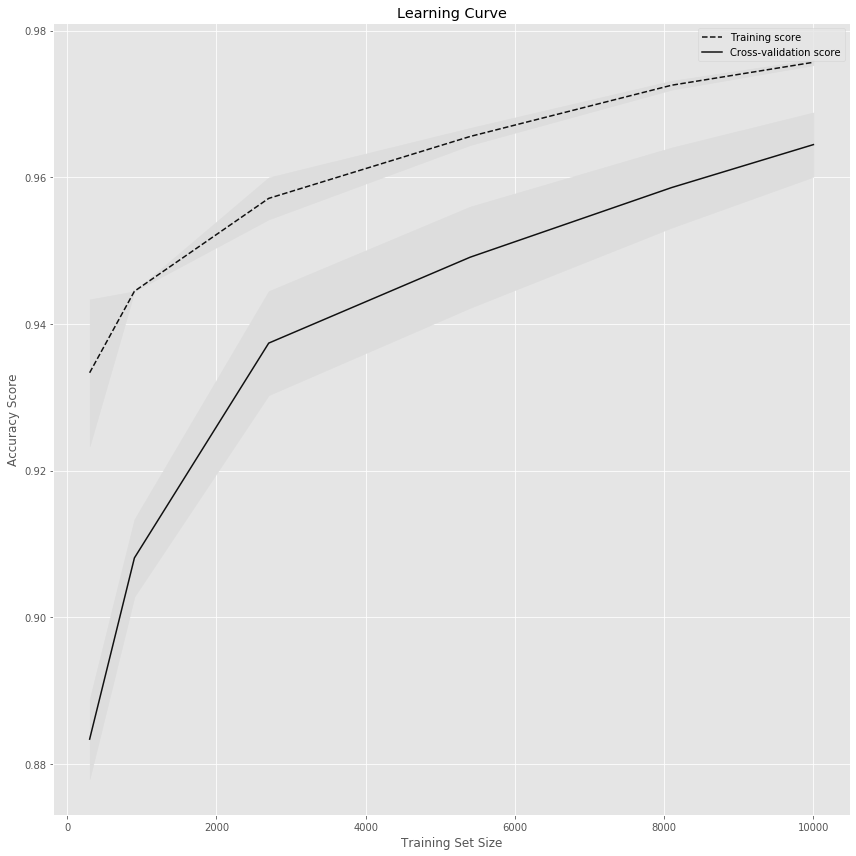

In [71]:
def Snippet_188_SSL(): 
    print()   
    
    
    # load libraries
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')
    
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    train_sizes = [300, 900, 2700, 5400, 8100, 10000]
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(random_state=40), 
                                               X_shuf1, Y_shuf1, cv=10, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=train_sizes)
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Draw lines
    plt.subplots(figsize=(12,12))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()
Snippet_188_SSL()

In [ ]:
# Active Learning + LogReg + Char

In [63]:
cv1 = CountVectorizer(analyzer='char', ngram_range =(3,7))
tfidf= TfidfTransformer(use_idf=True)
sm =SMOTE()
X_CV_FAR = cv1.fit_transform(FAR_train)
X_FAR = tfidf.fit_transform(X_CV_FAR)
sm_X_FAR, sm_Y_FAR = sm.fit_sample(X_FAR,yFAR_train)
X_shuf_FAR, Y_shuf_FAR = shuffle(sm_X_FAR, sm_Y_FAR)

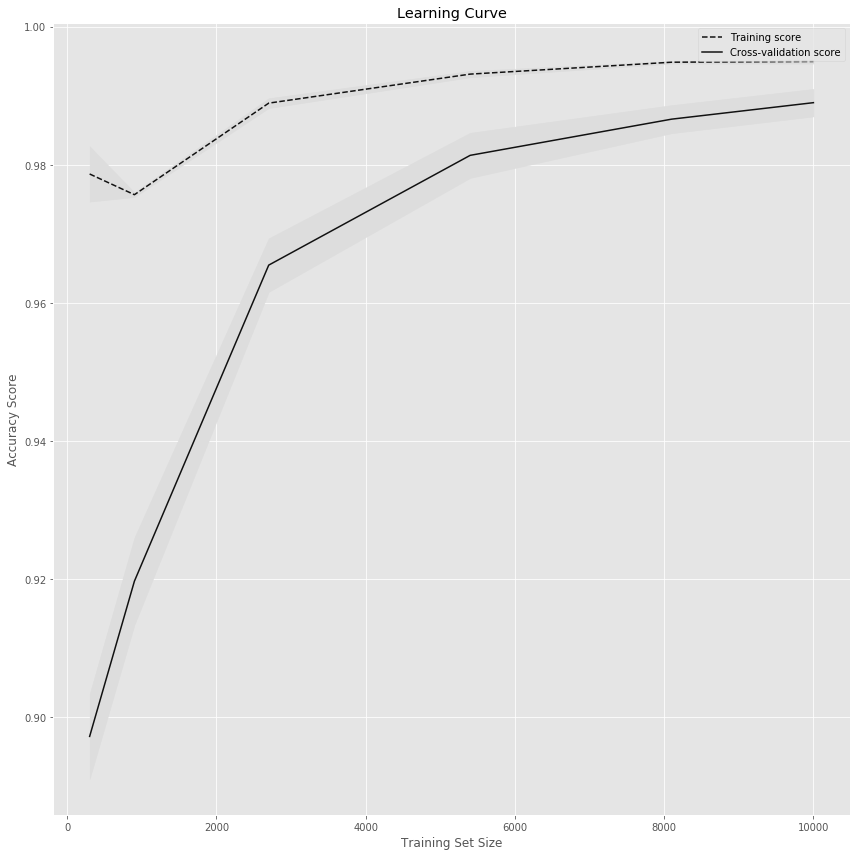

In [72]:
def Snippet_188_FAR1(): 
    print()   
    
    
    # load libraries
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')
    
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    train_sizes = [300, 900, 2700, 5400, 8100, 10000]
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(random_state=40), 
                                               X_shuf_FAR, Y_shuf_FAR, cv=10, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=train_sizes)
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Draw lines
    plt.subplots(figsize=(12,12))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()
Snippet_188_FAR1()

In [ ]:
# Cluster-and-Label (CTL) + LogReg + Char

In [66]:
train_CTL, test_CTL, y_tr_CTL, y_ts_CTL = train_test_split(fas_CTL, y_CTL, test_size =0.1319668, random_state = 0)

In [70]:
cv1 = CountVectorizer(analyzer='char', ngram_range =(3,7))
tfidf= TfidfTransformer(use_idf=True)
sm =SMOTE()
X_CV_CTL = cv1.fit_transform(train_CTL)
X_CTL = tfidf.fit_transform(X_CV_CTL)
sm_X_CTL, sm_Y_CTL = sm.fit_sample(X_CTL,y_tr_CTL)
X_shuf_CTL, Y_shuf_CTL = shuffle(sm_X_CTL, sm_Y_CTL)

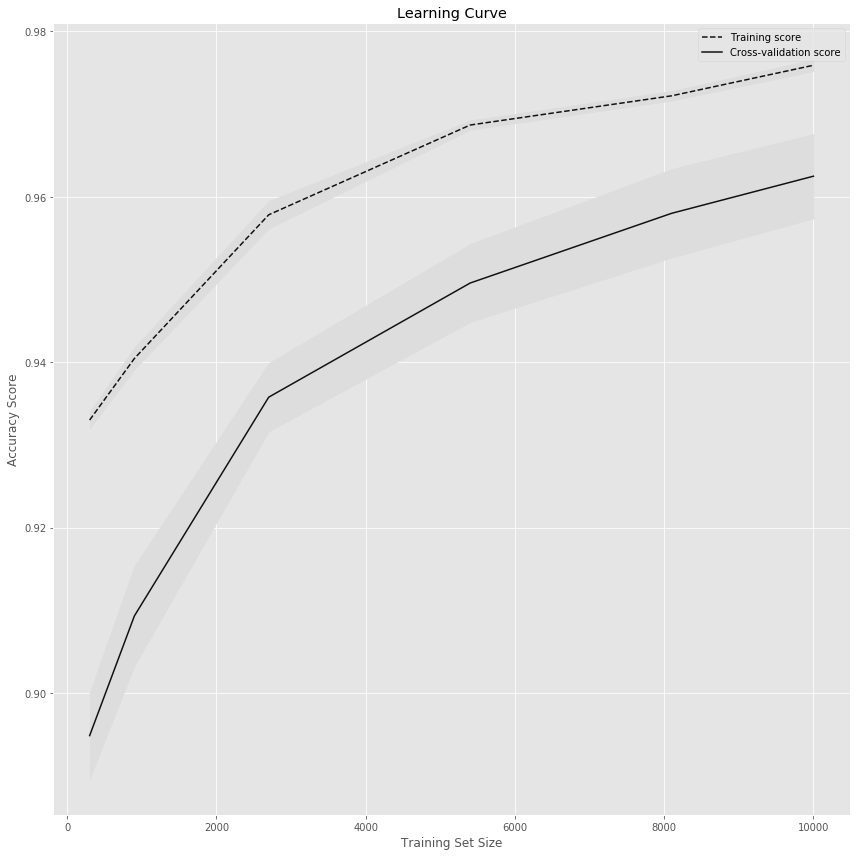

In [73]:
def Snippet_188_CTL(): 
    print()   
    
    
    # load libraries
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')
    
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    train_sizes = [300, 900, 2700, 5400, 8100,10000]
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(random_state=40), 
                                               X_shuf_CTL, Y_shuf_CTL, cv=10, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=train_sizes)
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Draw lines
    plt.subplots(figsize=(12,12))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()
Snippet_188_CTL()

In [ ]:
# Self_Learning + LogReg + Char

In [76]:
X_CV_SL = cv1.fit_transform(FJ_train_SL)
X_SL = tfidf.fit_transform(X_CV_SL)
sm_X_SL, sm_Y_SL = sm.fit_sample(X_SL,y_train_SL)
X_shuf_SL, Y_shuf_SL = shuffle(sm_X_SL, sm_Y_SL)

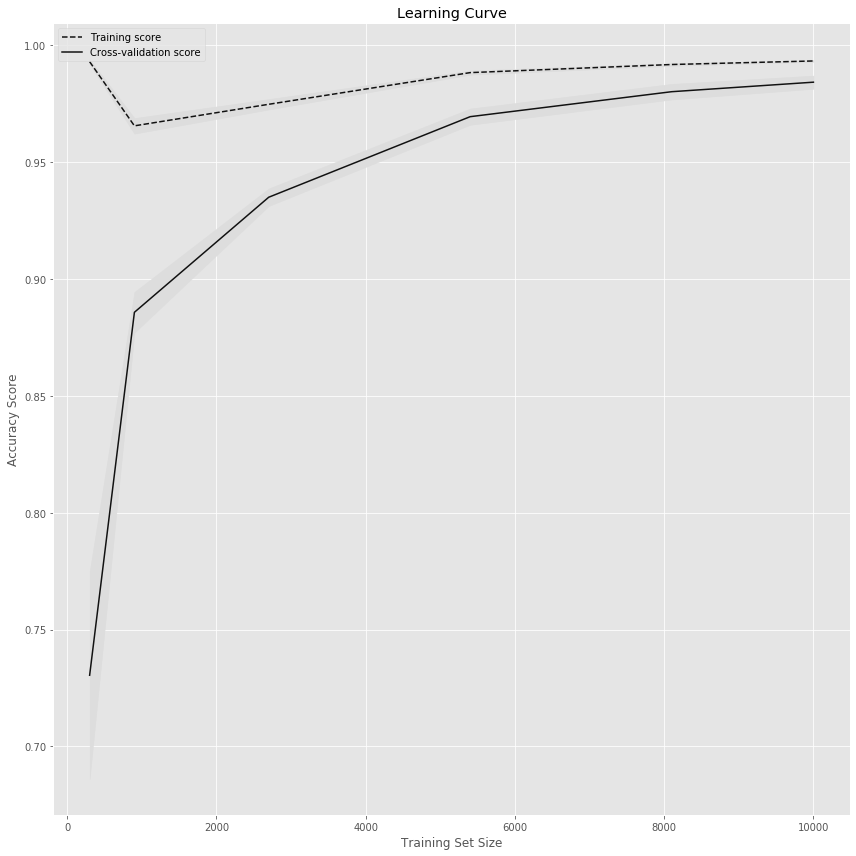

In [77]:
def Snippet_188_SL(): 
    print()   
    
    
    # load libraries
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')
    
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    train_sizes = [300, 900, 2700, 5400, 8100,10000]
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(random_state=40), 
                                               X_shuf_SL, Y_shuf_SL, cv=10, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=train_sizes)
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Draw lines
    plt.subplots(figsize=(12,12))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()
Snippet_188_SL()

# Significance Test for the difference in performance

In [75]:
y_categ_test_M = np.array(y_categ_test)

In [76]:
y_SSL_M = np.array(y_SSL)

In [77]:
y_SL_M = np.array(y_SL)

In [78]:
y_CTL_M = np.array(y_CTL)

In [81]:
y_AL_M = np.array(y_FAR)

In [ ]:
#  Check the significance of the difference in the performance of the four semi-supervised learning

In [82]:
import mlxtend
from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

In [83]:
q,p_value=cochrans_q(y_categ_test_M, y_SSL_M, y_SL_M, y_CTL_M, y_AL_M)

In [84]:
print (q)

368.75151515151515


In [85]:
print (p_value)

1.2974954558363927e-79


In [86]:
# Check the difference in the performance of SSL and each of the other classifiers

In [ ]:
#SSL vs SL

In [87]:
chi2_1, p_value_1 = mcnemar(mcnemar_table(y_categ_test_M, y_SSL_M, y_SL_M),corrected=False)

In [88]:
print(chi2_1)

136.34468085106383


In [89]:
print(p_value_1)

1.6773389147178558e-31


In [ ]:
# ssl vs CTL

In [90]:
chi2_2, p_value_2 = mcnemar(mcnemar_table(y_categ_test_M, y_SSL_M, y_CTL_M),corrected=False)

In [91]:
print(chi2_2)

1.2857142857142858


In [92]:
print(p_value_2)

0.2568392579578533


In [ ]:
# ssl vs AL

In [93]:
chi2_3, p_value_3 = mcnemar(mcnemar_table(y_categ_test_M, y_SSL_M, y_AL_M),corrected=False)

In [94]:
print(chi2_3)

119.14349775784753


In [95]:
print(p_value_3)

9.742074158759566e-28


# Information Gain 

In [96]:
from sklearn.feature_selection import mutual_info_classif
cv_word=CountVectorizer(max_df=0.95, min_df=2, max_features=50000, stop_words='english' )
X_vec=cv_word.fit_transform(FJ_train)

In [97]:
res=dict(zip(cv_word.get_feature_names(),
            mutual_info_classif(X_vec,y_categ_train,discrete_features=True)))

In [98]:
print(res)

{'aadocnetwork': 4.057888261253199e-05, 'aare': 4.057888261253199e-05, 'aaron': 6.087207539986865e-05, 'aba': 8.116777000595704e-05, 'abagezi': 6.087207539986865e-05, 'abahlala': 6.698122477166604e-05, 'abahlambi': 4.057888261253199e-05, 'abalone': 4.057888261253199e-05, 'abamnyama': 8.116777000595661e-05, 'abamzwayo': 4.057888261253199e-05, 'abandoned': 0.00010146596704411256, 'abansundu': 6.087207539986865e-05, 'abantu': 0.00024362346643915476, 'abasonwabe': 4.057888261253199e-05, 'abc': 8.764953315637471e-05, 'abdrewlee': 4.057888261253199e-05, 'abe': 0.00010146596704411256, 'abelungu': 0.007682692227281125, 'abemukela': 4.057888261253199e-05, 'aber': 6.087207539986865e-05, 'abhcosmetics': 6.087207539986865e-05, 'abi': 4.057888261253199e-05, 'ability': 4.057888261253199e-05, 'able': 0.00026394170523764623, 'abo': 4.057888261253199e-05, 'abolishment': 4.057888261253199e-05, 'abortion': 2.842106546567264e-05, 'abroad': 0.00028370887564953154, 'absaprem': 0.00014206987089339287, 'absol